# Heart disease Prediction using Classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:/Harish_Addada_Heart_Disease_Prediction/heart.csv', header=0) # importing data 

In [4]:
df.head() #this will give us the sample data from dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDD analysis
- This is Extended data dictionary
- This is used for univariate anaylsis that means analysis of songle variable
- In this we have count, mean, median, mode, max, min values this is used to describe the data

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Attribute Information:
- age : age in years
- sex : 1 = male, 0 = Female
- cp : chest pain type (4 values)
- trestbps : resting blood pressure (in mm Hg on admission to the hospital)
- chol : serum cholestoral in mg/dl
- fbs : fasting blood sugar > 120 mg/dl
- restecg : resting electrocardiographic results (values 0,1,2) 
- thalach : maximum heart rate achieved
- exang : exercise induced angina
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal : 0 = none; 1 = normal; 2 = fixed defect; 3 = reversable defect
- target : 0 = no disease; 1 = heart disease.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing values imputation
- if the varaibe is numeric and has missing values then we use mean, medain or mode to impute missing values.
- if the variable is categorical then we impute missing values with "unknown" such that it will also contribute.
- we use this missing value imputation if there are missing values in the variables.
- since there are no missing values in the data no need to do missing value imputation.

## Dummy vriable creation
- The ML model doesn't understand the categorical data so we have to convert that data into numeric i.e., (1,0) or (True, False).
- If the data have n categories then we have n-1 dummy variables.
- We use getdummies method from pandas to create dummy variables easily.
- since there is no categorical data in this there is no need to create dummy variables.

## Outliers Treatment
- Outliers are data points that differ significantly from other observations in a dataset. 
- They can be unusually high or low values compared to the rest. 
- Treating outliers is important because they can distort statistical analyses, affect model accuracy, and lead to incorrect conclusions if left unaddressed.

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Using this EDD analysis we can check if the data contains outliers.
- To check for outliers first we have to see the difference between mean and median(50%).
- If the difference between mean and medain(50%) is more then we can say we have outliers in the data.
- Now how to find on which end we have outliers (High end or low end)
- We can check that using boxplot or in EDD if we have outliers on low end the difference between min value and 25% will be high.
- else if we have outliers on high end the difference between max value and 75% will be high
- By this EDD analysis we can say there are no outliers present in the data.

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Visualizations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

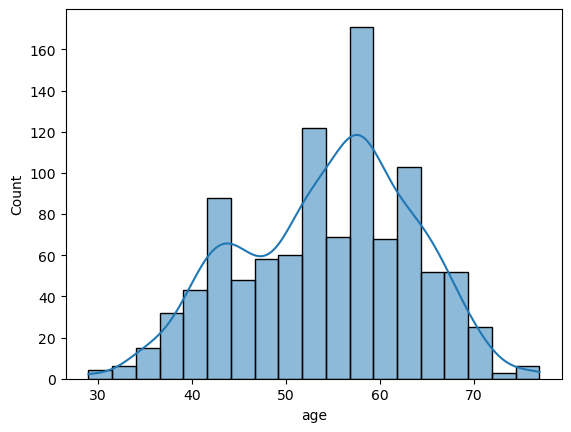

In [16]:
sns.histplot(x='age', data=df, kde=True)

- By the above histogram we can say majority of the people are in the age group 50 - 65

C:\Users\HARISH\AppData\Local\Temp\ipykernel_8024\3545001513.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


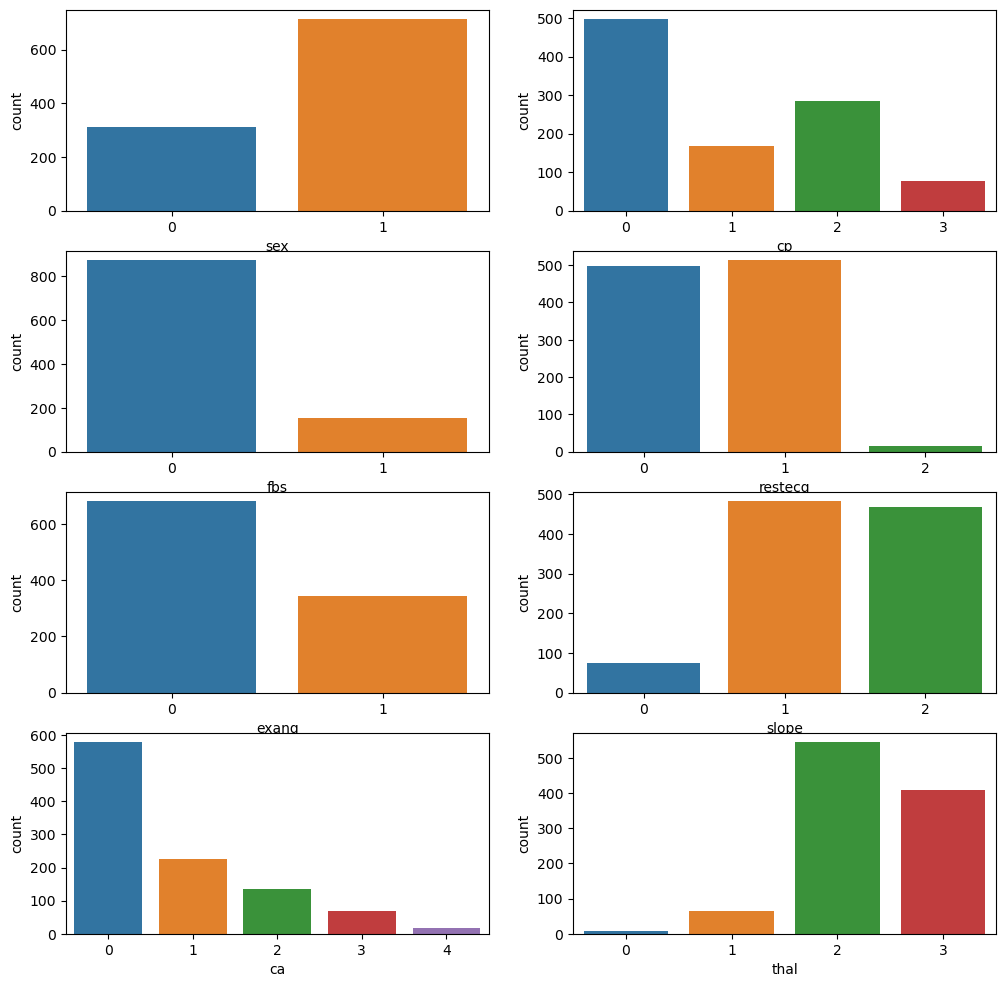

In [18]:
fig, axis= plt.subplots(4,2,figsize=(12,12))
sns.countplot(x=df['sex'],ax=axis[0,0])
sns.countplot(x=df['cp'],ax=axis[0,1])
sns.countplot(x=df['fbs'],ax=axis[1,0])
sns.countplot(x=df['restecg'],ax=axis[1,1])
sns.countplot(x=df['exang'],ax=axis[2,0])
sns.countplot(x=df['slope'],ax=axis[2,1])
sns.countplot(x=df['ca'],ax=axis[3,0])
sns.countplot(x=df['thal'],ax=axis[3,1])
fig.show()

- The above charts are some observations

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

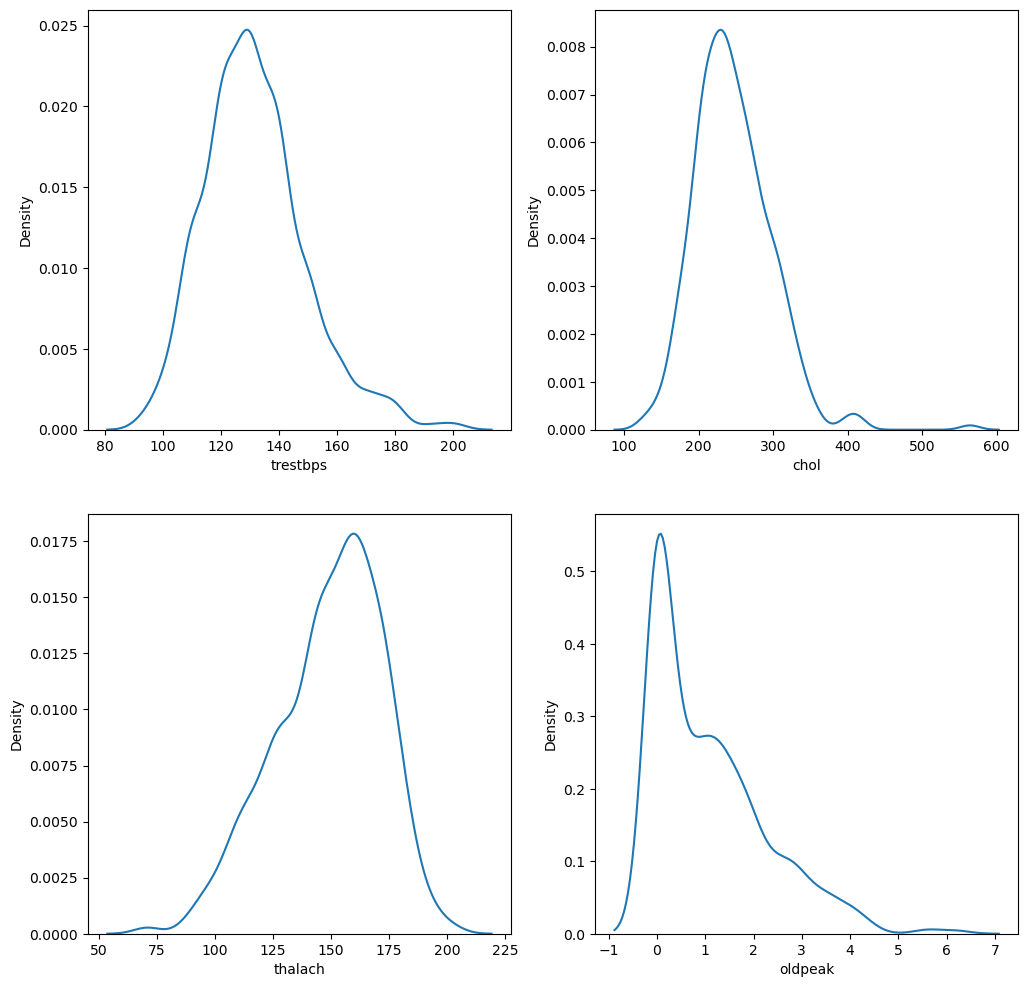

In [20]:
fig, axis= plt.subplots(2,2,figsize=(12,12))
sns.kdeplot(x=df['trestbps'],ax=axis[0,0])
sns.kdeplot(x=df['chol'],ax=axis[0,1])
sns.kdeplot(x=df['thalach'],ax=axis[1,0])
sns.kdeplot(x=df['oldpeak'],ax=axis[1,1])
fig.show()

<Axes: xlabel='target', ylabel='count'>

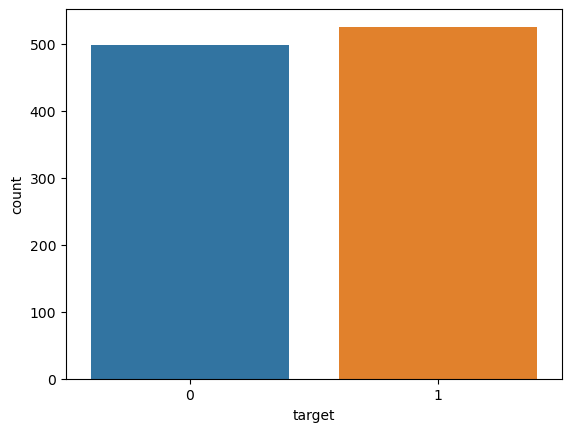

In [21]:
sns.countplot(x='target', data=df)

- The target variable data is decent 

## Correlation matrix
- This correlation matrix is for bi-variate analysis
- this will tell us if the two variables moving together or not
- Here we have correlation coefficient in between 2 variables
- if coefficient value is close to +1 or -1 then we can say we have a +ve or -ve correlation
- if the coefficient value is close to zero then we can say we have no correlation

In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [25]:
correlation_matrix = df.corr()

# Sort the correlation matrix by the 'target' column
correlations = correlation_matrix['target'].sort_values(ascending=False)
correlations

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

- From the above analysis the fbs and chol are more close to zero they are not contributing in our data much
- As per my research chol is very important so i dont want to remove it iam removing fbs from data

In [27]:
del df['fbs']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


## X - y (Independent, dependent) split
- we have to split the data to independent variables and dependent variables.
- here the dependent variable is target variable remaining all are independent variables.
- by using these independent variables we predict the target variable after training the model.

In [30]:
X = df.loc[:, df.columns != 'target'] #using loc i assigned the independent variable to X except the target variable

In [31]:
y = df['target'] # i assigned the target variable to y

In [32]:
X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,1,168,0,1.0,2,2,3
1,53,1,0,140,203,0,155,1,3.1,0,0,3
2,70,1,0,145,174,1,125,1,2.6,0,0,3
3,61,1,0,148,203,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,106,0,1.9,1,3,2


In [33]:
X.shape #this will give us the number of rows and columns

(1025, 12)

In [34]:
y.shape

(1025,)

## Train_Test_Split
- using this train test split we split the data into train data and test data
- The training set is used to train the model, while the test set is used to evaluate the model's performance on new data.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
X_train.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
315,42,1,3,148,244,0,178,0,0.8,2,2,2
204,66,0,2,146,278,0,152,0,0.0,1,1,2
363,53,1,2,130,246,0,173,0,0.0,2,3,2
5,58,0,0,100,248,0,122,0,1.0,1,0,2
1017,53,1,0,123,282,1,95,1,2.0,1,2,3


In [39]:
y_train.head()

315     1
204     1
363     1
5       1
1017    0
Name: target, dtype: int64

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 12) (205, 12) (820,) (205,)


## Normalizing the data
Normalization is the process of adjusting the values of numerical features in a dataset to a common scale, without distorting differences in the ranges of values. This is typically done to make features comparable and improve the performance and convergence speed of machine learning algorithms.

In [42]:
from sklearn import preprocessing

In [43]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [44]:
X_train_s = scaler.transform(X_train)

In [45]:
X_test_s = scaler.transform(X_test)

## Building Predictive models
- Since this the classification problem iam using classifications models like logistic regression, lda, knn, decision trees

## 1) Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf_lr = LogisticRegression()

In [50]:
clf_lr.fit(X_train_s, y_train)

LogisticRegression()

In [51]:
y_pred_lr = clf_lr.predict(X_test_s) #prediction using testing data

## Model performance
- confusion matrix :
  A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive, true negative, false    positive, and false negative predictions, providing a clear way to see how well the model is classifying each category.

  True Positive (TP): The model correctly predicted the positive class.
  True Negative (TN): The model correctly predicted the negative class.
  False Positive (FP): The model incorrectly predicted the positive class (also known as a "Type I error").
  False Negative (FN): The model incorrectly predicted the negative class (also known as a "Type II error").

  This matrix helps in calculating various performance metrics like accuracy, precision, recall, and F1 score.

- Precision score : Precision measures how many of the positive predictions made by the model were actually correct.
- Recall score : Recall (or Sensitivity) measures how many actual positive instances were correctly predicted by the model.
- F1 score : The F1 score is the harmonic mean of precision and recall, providing a balance between the two.
- Roc auc acore : The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score measures the ability of the model to distinguish between classes.
- Accuracy measures the proportion of correctly predicted instances out of all instances.

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[ 77,  21],
       [  7, 100]], dtype=int64)

- True Negatives (TN) = 77:
The model correctly predicted 77 instances as negative (correctly classified as not belonging to the positive class).
- False Positives (FP) = 21:
The model incorrectly predicted 21 instances as positive when they were actually negative (Type I error).
- False Negatives (FN) = 7:
The model incorrectly predicted 7 instances as negative when they were actually positive (Type II error).
- True Positives (TP) = 100:
The model correctly predicted 100 instances as positive (correctly classified as belonging to the positive class).

In [55]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

In [56]:
precision_score(y_test,y_pred_lr)

0.8264462809917356

In [57]:
recall_score(y_test, y_pred_lr)

0.9345794392523364

In [58]:
f1_score(y_test, y_pred_lr)

0.8771929824561404

In [59]:
roc_auc_score(y_test, y_pred_lr)

0.8601468624833111

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test,y_pred_lr)

0.8634146341463415

In [62]:
y_train_lr_pred = clf_lr.predict(X_train_s) # to check overfitting

In [63]:
accuracy_score(y_train,y_train_lr_pred)

0.8585365853658536

## 2) Linear Discriminant analysis

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
clf_lda = LinearDiscriminantAnalysis()

In [67]:
clf_lda.fit(X_train_s,y_train)

LinearDiscriminantAnalysis()

In [68]:
y_pred_lda = clf_lda.predict(X_test_s)

## Model Performance

In [70]:
confusion_matrix(y_test,y_pred_lda)

array([[ 74,  24],
       [  6, 101]], dtype=int64)

- True Negatives (TN) = 74:
The model correctly predicted 74 instances as negative (correctly classified as not belonging to the positive class).
- False Positives (FP) = 24:
The model incorrectly predicted 24 instances as positive when they were actually negative (Type I error).
- False Negatives (FN) = 6:
The model incorrectly predicted 6 instances as negative when they were actually positive (Type II error).
- True Positives (TP) = 101:
The model correctly predicted 101 instances as positive (correctly classified as belonging to the positive class).

In [72]:
precision_score(y_test, y_pred_lda)

0.808

In [73]:
recall_score(y_test, y_pred_lda)

0.9439252336448598

In [74]:
f1_score(y_test, y_pred_lda)

0.8706896551724138

In [75]:
roc_auc_score(y_test, y_pred_lda)

0.8495136372305931

In [76]:
accuracy_score(y_test, y_pred_lda)

0.8536585365853658

In [77]:
y_train_lda_pred = clf_lda.predict(X_train_s)

In [78]:
accuracy_score(y_train, y_train_lda_pred)

0.8280487804878048

## 3) KNN Classification

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [82]:
clf_knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred_knn = clf_knn.predict(X_test_s)

## Model performance

In [85]:
confusion_matrix(y_test,y_pred_knn)

array([[ 98,   0],
       [  2, 105]], dtype=int64)

- True Negatives (TN) = 90:
The model correctly predicted 90 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) = 8:
The model incorrectly predicted 8 instances as positive when they were actually negative (Type I error).
- False Negatives (FN) = 10:
The model incorrectly predicted 10 instances as negative when they were actually positive (Type II error).
- True Positives (TP) = 97:
The model correctly predicted 97 instances as positive (the true class is positive, and the model predicted it as positive).

In [87]:
precision_score(y_test, y_pred_knn)

1.0

In [88]:
recall_score(y_test, y_pred_knn)

0.9813084112149533

In [89]:
f1_score(y_test, y_pred_knn)

0.9905660377358491

In [90]:
roc_auc_score(y_test, y_pred_knn)

0.9906542056074766

In [91]:
accuracy_score(y_test, y_pred_knn)

0.9902439024390244

In [92]:
y_train_knn_pred = clf_knn.predict(X_train_s)

In [93]:
accuracy_score(y_train, y_train_knn_pred)

0.998780487804878

## 4) KNN using grid search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [97]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [98]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [99]:
grid_search_cv.best_params_

{'n_neighbors': 1}

In [100]:
optimised_KNN = grid_search_cv.best_estimator_

In [101]:
y_test_pred_CV = optimised_KNN.predict(X_test_s)

In [102]:
confusion_matrix(y_test,y_test_pred_CV)

array([[ 98,   0],
       [  0, 107]], dtype=int64)

- True Negatives (TN) = 98:
The model correctly predicted 98 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) = 0:
The model did not incorrectly predict any negative instances as positive (there were no false positives).
- False Negatives (FN) = 0:
The model did not incorrectly predict any positive instances as negative (there were no false negatives).
- True Positives (TP) = 107:
The model correctly predicted 107 instances as positive (the true class is positive, and the model predicted it as positive).

In [104]:
precision_score(y_test, y_test_pred_CV)

1.0

In [105]:
recall_score(y_test, y_test_pred_CV)

1.0

In [106]:
f1_score(y_test, y_test_pred_CV)

1.0

In [107]:
roc_auc_score(y_test, y_test_pred_CV)

1.0

In [108]:
accuracy_score(y_test, y_test_pred_CV)

1.0

In [109]:
y_train_cv_pred = optimised_KNN.predict(X_train_s)

In [110]:
accuracy_score(y_train, y_train_cv_pred)

1.0

- From the above we can say knn leads to overfitting since the data set is small

## 5) Random forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees is a common default

In [115]:
clf_rfc.fit(X_train_s, y_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred_rfc = clf_rfc.predict(X_test_s)

## Model Performance

In [118]:
confusion_matrix(y_test,y_pred_rfc)

array([[ 98,   0],
       [  0, 107]], dtype=int64)

- True Negatives (TN) = 98:
The model correctly predicted 98 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) = 0:
The model did not incorrectly predict any negative instances as positive (there were no false positives).
- False Negatives (FN) = 0:
The model did not incorrectly predict any positive instances as negative (there were no false negatives).
- True Positives (TP) = 107:
The model correctly predicted 107 instances as positive (the true class is positive, and the model predicted it as positive).

In [120]:
precision_score(y_test, y_pred_rfc)

1.0

In [121]:
recall_score(y_test, y_pred_rfc)

1.0

In [122]:
f1_score(y_test, y_pred_rfc)

1.0

In [123]:
roc_auc_score(y_test, y_pred_rfc)

1.0

In [124]:
accuracy_score(y_test, y_pred_rfc)

1.0

In [125]:
y_train_rfc_pred = clf_rfc.predict(X_train_s)

In [126]:
accuracy_score(y_train, y_train_rfc_pred)

1.0

- Decision trees also overfitting since data is less

## Analysis of models
- Accuracy score of Logistic regression is 86%
- Accuracy score of LDA is 85%
- The KNN and Decision Trees are overfitting so iam not considering them
- Since my data the accuracy score of logistic regression is more iam considering this model for prediction of this problem

## Deployment
- Here iam using pickle to deploy my model using flask api
- Pickle is a Python module used to serialize and deserialize Python objects. 
- Serialization, also called pickling. 
- Serialization is the process of converting a Python object into a byte stream (so it can be saved to a file or transferred over a network), 
- while deserialization, or unpickling, is the process of converting that byte stream back into the original Python object.

In [130]:
import pickle

In [131]:
with open('heart_model.pkl', 'wb') as f:
    pickle.dump({'model': clf_lr, 'scaler': scaler}, f)